In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
sns.set(font_scale=1.3)

#volcano plot을 그리기 위한 cutoff 등을 지정하는 함수
def plotprocess():
    #log10 P-value를 구하기 위해, 불러온 데이터프레임의 'P.value' column에 log10을 취함
    res['logPV'] = res['P.Value'].apply(lambda x: -(math.log10(x)))
    #upregulation된 sample(pl), downregulation된 sample(mi), 기타(etc)로 나누어 type이라는 column을 만듦
    res['type'] = 'etc'
    #log2 fold change를 1.2 초과 또는 1/1.2 미만으로 cutoff함
    logfc = math.log2(1.2)
    #P-value cutoff를 지정함
    pval = 0.05
    
    #P-value와 logFC를 cutoff 적용하여, pl과 mi type을 나눔
    for i in res.index:
        if res.at[i, 'P.Value'] < pval:
            if res.at[i, 'logFC'] > logfc:
                res.at[i, 'type'] = 'pl'
            elif res.at[i, 'logFC'] < -logfc:
                res.at[i, 'type'] = 'mi'

---
## GSE28460

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and wil

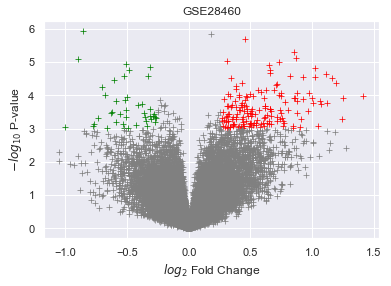

In [2]:
#res 변수에 limma 분석 결과를 불러옴
res = pd.read_csv('./28460/res.csv')
plotprocess()

#scatterplot을 그림. x축은 logFC, y축은 logPV, 분류는 type으로 지정함
f1 = sns.scatterplot('logFC', 'logPV', marker='+', hue='type', data = res, palette = {'mi':'green', 'pl':'red', 'etc':'gray'}, legend = False)

#구역별 line으로 구분하기 위한 코드와 limit을 지정하기 위한 코드
# f1.vlines (1, 0, 9, colors = 'black')
# f1.vlines (-1, 0, 9, colors = 'black')
# f1.hlines (-(math.log10(0.05)), -20, 20, colors = 'black')
# axes = f1.axes
# f1.set_xlim(-20,20)
# f1.set_ylim(0, 6.5)

plt.title('GSE28460')
plt.xlabel('${log_{2}}$ Fold Change')
plt.ylabel('${-log_{10}}$ P-value')

#plot 저장하기
plt.savefig('./volcano_gse28460.png', dpi=300, bbox_inches='tight')